# Table of Contents
 <p><div class="lev1 toc-item"><a href="#Transformer-Network-Application:-Named-Entity-Recognition" data-toc-modified-id="Transformer-Network-Application:-Named-Entity-Recognition-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Transformer Network Application: Named-Entity Recognition</a></div><div class="lev2 toc-item"><a href="#Packages" data-toc-modified-id="Packages-11"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Packages</a></div><div class="lev2 toc-item"><a href="#1---Named-Entity-Recogniton-to-Process-Resumes" data-toc-modified-id="1---Named-Entity-Recogniton-to-Process-Resumes-12"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>1 - Named-Entity Recogniton to Process Resumes</a></div><div class="lev3 toc-item"><a href="#1.1---Dataset-Cleaning" data-toc-modified-id="1.1---Dataset-Cleaning-121"><span class="toc-item-num">1.2.1&nbsp;&nbsp;</span>1.1 - Dataset Cleaning</a></div><div class="lev3 toc-item"><a href="#1.2---Padding-and-Generating-Tags" data-toc-modified-id="1.2---Padding-and-Generating-Tags-122"><span class="toc-item-num">1.2.2&nbsp;&nbsp;</span>1.2 - Padding and Generating Tags</a></div><div class="lev3 toc-item"><a href="#1.3---Tokenize-and-Align-Labels-with-🤗-Library" data-toc-modified-id="1.3---Tokenize-and-Align-Labels-with-🤗-Library-123"><span class="toc-item-num">1.2.3&nbsp;&nbsp;</span>1.3 - Tokenize and Align Labels with 🤗 Library</a></div><div class="lev3 toc-item"><a href="#Exercise-1---tokenize_and_align_labels" data-toc-modified-id="Exercise-1---tokenize_and_align_labels-124"><span class="toc-item-num">1.2.4&nbsp;&nbsp;</span>Exercise 1 - tokenize_and_align_labels</a></div><div class="lev2 toc-item"><a href="#Star-From-Here" data-toc-modified-id="Star-From-Here-13"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Star From Here</a></div><div class="lev3 toc-item"><a href="#1.4---Optimization" data-toc-modified-id="1.4---Optimization-131"><span class="toc-item-num">1.3.1&nbsp;&nbsp;</span>1.4 - Optimization</a></div><div class="lev3 toc-item"><a href="#Congratulations!" data-toc-modified-id="Congratulations!-132"><span class="toc-item-num">1.3.2&nbsp;&nbsp;</span>Congratulations!</a></div><div class="lev4 toc-item"><a href="#Here's-what-you-should-remember" data-toc-modified-id="Here's-what-you-should-remember-1321"><span class="toc-item-num">1.3.2.1&nbsp;&nbsp;</span>Here's what you should remember</a></div><div class="lev2 toc-item"><a href="#Appendix-(Nothing-Useful)" data-toc-modified-id="Appendix-(Nothing-Useful)-14"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Appendix (Nothing Useful)</a></div>

# Transformer Network Application: Named-Entity Recognition

Welcome to Week 4's first ungraded lab. In this notebook you'll explore one application of the transformer architecture that you built in the previous assignment.

**After this assignment you'll be able to**:

* Use tokenizers and pre-trained models from the HuggingFace Library.
* Fine-tune a pre-trained transformer model for Named-Entity Recognition

## Table of Contents

- [Packages](#0)
- [1 - Named-Entity Recogniton to Process Resumes](#1)
    - [1.1 - Data Cleaning](#1-1)
    - [1.2 - Padding and Generating Tags](#1-2)
    - [1.3 - Tokenize and Align Labels with 🤗 Library](#1-3)
        - [Exercise 1 - tokenize_and_align_labels](#ex-1)
    - [1.4 - Optimization](#1-4)

<a name='0'></a>
## Packages

Run the following cell to load the packages you'll need.

In [24]:
import pandas as pd
import tensorflow as tf
import json
import random
import logging
import re

<a name='1'></a>
## 1 - Named-Entity Recogniton to Process Resumes

When faced with a large amount of unstructured text data, named-entity recognition (NER) can help you detect and classify important information in your dataset. For instance, in the running example "Jane vists Africa in September", NER would help you detect "Jane", "Africa", and "September" as named-entities and classify them as person, location, and time. 

* You will use a variation of the Transformer model you built in the last assignment to process a large dataset of resumes.
* You will find and classify relavent information such as the companies the applicant worked at, skills, type of degree, etc. 

<a name='1-1'></a>
### 1.1 - Dataset Cleaning

In this assignment you will optimize a Transformer model on a dataset of resumes. Take a look at how the data you will be working with are structured.

In [25]:
df_data = pd.read_json("ner.json", lines=True)
df_data = df_data.drop(['extras'], axis=1)
df_data['content'] = df_data['content'].str.replace("\n", " ")

In [26]:
df_data.head()

,content,annotation
0,Abhishek Jha Application Development Associate...,"[{'label': ['Skills'], 'points': [{'start': 12..."
1,Afreen Jamadar Active member of IIIT Committee...,"[{'label': ['Email Address'], 'points': [{'sta..."
2,"Akhil Yadav Polemaina Hyderabad, Telangana - E...","[{'label': ['Skills'], 'points': [{'start': 37..."
3,Alok Khandai Operational Analyst (SQL DBA) Eng...,"[{'label': ['Skills'], 'points': [{'start': 80..."
4,Ananya Chavan lecturer - oracle tutorials Mum...,"[{'label': ['Degree'], 'points': [{'start': 20..."


##### Understand Our Annotation Data (Tagged Data)

The df_data['annotation'] includes the tagged data, with a pair ('point'

In [27]:
df_data.iloc[0]['content'][1295:1621]

' • Programming language: C, C++, Java • Oracle PeopleSoft • Internet Of Things • Machine Learning • Database Management System • Computer Networks • Operating System worked on: Linux, Windows, Mac  Non - Technical Skills  • Honest and Hard-Working • Tolerant and Flexible to Different Situations • Polite and Calm • Team-Playe'

In [28]:
df_data.iloc[0]['annotation']
# a list of dictionary, inside each ditionary it has lables=[skill, name, email, etc], points:[indicate the positions]

[{'label': ['Skills'],
  'points': [{'start': 1295,
    'end': 1621,
    'text': '\n• Programming language: C, C++, Java\n• Oracle PeopleSoft\n• Internet Of Things\n• Machine Learning\n• Database Management System\n• Computer Networks\n• Operating System worked on: Linux, Windows, Mac\n\nNon - Technical Skills\n\n• Honest and Hard-Working\n• Tolerant and Flexible to Different Situations\n• Polite and Calm\n• Team-Player'}]},
 {'label': ['Skills'],
  'points': [{'start': 993,
    'end': 1153,
    'text': 'C (Less than 1 year), Database (Less than 1 year), Database Management (Less than 1 year),\nDatabase Management System (Less than 1 year), Java (Less than 1 year)'}]},
 {'label': ['College Name'],
  'points': [{'start': 939, 'end': 956, 'text': 'Kendriya Vidyalaya'}]},
 {'label': ['College Name'],
  'points': [{'start': 883, 'end': 904, 'text': 'Woodbine modern school'}]},
 {'label': ['Graduation Year'],
  'points': [{'start': 856, 'end': 860, 'text': '2017\n'}]},
 {'label': ['College 

In [29]:
for i in df_data.iloc[0]['annotation']:
    print(i['label'])

['Skills']
['Skills']
['College Name']
['College Name']
['Graduation Year']
['College Name']
['Designation']
['Companies worked at']
['Designation']
['Email Address']
['Location']
['Companies worked at']
['Designation']
['Name']


##### Continue Our Example

In [30]:
def mergeIntervals(intervals):
    sorted_by_lower_bound = sorted(intervals, key=lambda tup: tup[0])
    merged = []

    for higher in sorted_by_lower_bound:
        if not merged:
            merged.append(higher)
        else:
            lower = merged[-1]
            if higher[0] <= lower[1]:
                if lower[2] is higher[2]:
                    upper_bound = max(lower[1], higher[1])
                    merged[-1] = (lower[0], upper_bound, lower[2])
                else:
                    if lower[1] > higher[1]:
                        merged[-1] = lower
                    else:
                        merged[-1] = (lower[0], higher[1], higher[2])
            else:
                merged.append(higher)
    return merged

In [31]:
def get_entities(df):
    
    entities = []
    
    for i in range(len(df)):
        entity = []
    
        for annot in df['annotation'][i]:
            try:
                ent = annot['label'][0]
                start = annot['points'][0]['start']
                end = annot['points'][0]['end'] + 1
                entity.append((start, end, ent))
            except:
                pass
    
        entity = mergeIntervals(entity)
        entities.append(entity)
    
    return entities

In [32]:
df_data['entities'] = get_entities(df_data)
df_data.head()

,content,annotation,entities
0,Abhishek Jha Application Development Associate...,"[{'label': ['Skills'], 'points': [{'start': 12...","[(0, 12, Name), (13, 46, Designation), (49, 58..."
1,Afreen Jamadar Active member of IIIT Committee...,"[{'label': ['Email Address'], 'points': [{'sta...","[(0, 14, Name), (62, 68, Location), (104, 148,..."
2,"Akhil Yadav Polemaina Hyderabad, Telangana - E...","[{'label': ['Skills'], 'points': [{'start': 37...","[(0, 21, Name), (22, 31, Location), (65, 117, ..."
3,Alok Khandai Operational Analyst (SQL DBA) Eng...,"[{'label': ['Skills'], 'points': [{'start': 80...","[(0, 12, Name), (13, 51, Designation), (54, 60..."
4,Ananya Chavan lecturer - oracle tutorials Mum...,"[{'label': ['Degree'], 'points': [{'start': 20...","[(0, 13, Name), (14, 22, Designation), (24, 41..."


In [33]:
df_data['entities'].iloc[0]

[(0, 12, 'Name'),
 (13, 46, 'Designation'),
 (49, 58, 'Companies worked at'),
 (60, 69, 'Location'),
 (95, 146, 'Email Address'),
 (372, 405, 'Designation'),
 (407, 416, 'Companies worked at'),
 (727, 770, 'Designation'),
 (771, 814, 'College Name'),
 (856, 861, 'Graduation Year'),
 (883, 905, 'College Name'),
 (939, 957, 'College Name'),
 (993, 1154, 'Skills'),
 (1295, 1622, 'Skills')]

In [34]:
def convert_dataturks_to_spacy(dataturks_JSON_FilePath):
    try:
        training_data = []
        lines=[]
        with open(dataturks_JSON_FilePath, 'r') as f:
            lines = f.readlines()

        for line in lines:
            data = json.loads(line)
            text = data['content'].replace("\n", " ")
            entities = []
            data_annotations = data['annotation']
            if data_annotations is not None:
                for annotation in data_annotations:
                    #only a single point in text annotation.
                    point = annotation['points'][0]
                    labels = annotation['label']
                    # handle both list of labels or a single label.
                    if not isinstance(labels, list):
                        labels = [labels]

                    for label in labels:
                        point_start = point['start']
                        point_end = point['end']
                        point_text = point['text']
                        
                        lstrip_diff = len(point_text) - len(point_text.lstrip())
                        rstrip_diff = len(point_text) - len(point_text.rstrip())
                        if lstrip_diff != 0:
                            point_start = point_start + lstrip_diff
                        if rstrip_diff != 0:
                            point_end = point_end - rstrip_diff
                        entities.append((point_start, point_end + 1 , label))
            training_data.append((text, {"entities" : entities}))
        return training_data
    except Exception as e:
        logging.exception("Unable to process " + dataturks_JSON_FilePath + "\n" + "error = " + str(e))
        return None

def trim_entity_spans(data: list) -> list:
    """Removes leading and trailing white spaces from entity spans.

    Args:
        data (list): The data to be cleaned in spaCy JSON format.

    Returns:
        list: The cleaned data.
    """
    invalid_span_tokens = re.compile(r'\s')

    cleaned_data = []
    for text, annotations in data:
        entities = annotations['entities']
        valid_entities = []
        for start, end, label in entities:
            valid_start = start
            valid_end = end
            while valid_start < len(text) and invalid_span_tokens.match(
                    text[valid_start]):
                valid_start += 1
            while valid_end > 1 and invalid_span_tokens.match(
                    text[valid_end - 1]):
                valid_end -= 1
            valid_entities.append([valid_start, valid_end, label])
        cleaned_data.append([text, {'entities': valid_entities}])
    return cleaned_data  

In [35]:
data = trim_entity_spans(convert_dataturks_to_spacy("ner.json"))

In [38]:
from tqdm.notebook import tqdm
def clean_dataset(data):
    cleanedDF = pd.DataFrame(columns=["setences_cleaned"])
    sum1 = 0
    for i in tqdm(range(len(data))):
        start = 0
        emptyList = ["Empty"] * len(data[i][0].split())
        numberOfWords = 0
        lenOfString = len(data[i][0])
        strData = data[i][0]
        strDictData = data[i][1]
        lastIndexOfSpace = strData.rfind(' ')
        for i in range(lenOfString):
            if (strData[i]==" " and strData[i+1]!=" "):
                for k,v in strDictData.items():
                    for j in range(len(v)):
                        entList = v[len(v)-j-1]
                        if (start>=int(entList[0]) and i<=int(entList[1])):
                            emptyList[numberOfWords] = entList[2]
                            break
                        else:
                            continue
                start = i + 1  
                numberOfWords += 1
            if (i == lastIndexOfSpace):
                for j in range(len(v)):
                        entList = v[len(v)-j-1]
                        if (lastIndexOfSpace>=int(entList[0]) and lenOfString<=int(entList[1])):
                            emptyList[numberOfWords] = entList[2]
                            numberOfWords += 1
        cleanedDF = cleanedDF.append(pd.Series([emptyList],  index=cleanedDF.columns ), ignore_index=True )
        sum1 = sum1 + numberOfWords
    return cleanedDF

In [39]:
cleanedDF = clean_dataset(data)

  0%|          | 0/220 [00:00<?, ?it/s]

In [40]:
df_data['content'].iloc[1]

'Afreen Jamadar Active member of IIIT Committee in Third year  Sangli, Maharashtra - Email me on Indeed: indeed.com/r/Afreen-Jamadar/8baf379b705e37c6  I wish to use my knowledge, skills and conceptual understanding to create excellent team environments and work consistently achieving organization objectives believes in taking initiative and work to excellence in my work.  WORK EXPERIENCE  Active member of IIIT Committee in Third year  Cisco Networking -  Kanpur, Uttar Pradesh  organized by Techkriti IIT Kanpur and Azure Skynet. PERSONALLITY TRAITS: • Quick learning ability • hard working  EDUCATION  PG-DAC  CDAC ACTS  2017  Bachelor of Engg in Information Technology  Shivaji University Kolhapur -  Kolhapur, Maharashtra  2016  SKILLS  Database (Less than 1 year), HTML (Less than 1 year), Linux. (Less than 1 year), MICROSOFT ACCESS (Less than 1 year), MICROSOFT WINDOWS (Less than 1 year)  ADDITIONAL INFORMATION  TECHNICAL SKILLS:  • Programming Languages: C, C++, Java, .net, php. • Web D

In [41]:
cleanedDF.iloc[1].values

array([list(['Name', 'Name', 'Empty', 'Empty', 'Empty', 'Empty', 'Empty', 'Empty', 'Empty', 'Empty', 'Empty', 'Empty', 'Empty', 'Empty', 'Empty', 'Empty', 'Empty', 'Empty', 'Empty', 'Empty', 'Empty', 'Empty', 'Empty', 'Empty', 'Empty', 'Empty', 'Empty', 'Empty', 'Empty', 'Empty', 'Empty', 'Empty', 'Empty', 'Empty', 'Empty', 'Empty', 'Empty', 'Empty', 'Empty', 'Empty', 'Empty', 'Empty', 'Empty', 'Empty', 'Empty', 'Empty', 'Empty', 'Empty', 'Empty', 'Empty', 'Empty', 'Empty', 'Empty', 'Empty', 'Empty', 'Empty', 'Empty', 'Empty', 'Empty', 'Empty', 'Empty', 'Empty', 'Empty', 'Empty', 'Empty', 'Empty', 'Empty', 'Empty', 'Empty', 'Empty', 'Empty', 'Empty', 'Empty', 'Empty', 'Empty', 'Empty', 'Empty', 'Empty', 'Empty', 'Empty', 'Empty', 'Empty', 'Empty', 'Empty', 'Empty', 'College Name', 'Empty', 'Empty', 'Degree', 'Degree', 'Degree', 'Degree', 'Degree', 'Empty', 'College Name', 'College Name', 'College Name', 'Empty', 'Empty', 'Empty', 'Empty', 'Empty', 'Skills', 'Skills', 'Skills', 'Skills'

Take a look at your cleaned dataset and the categories the named-entities are matched to, or 'tags'.

In [43]:
cleanedDF.head()

,setences_cleaned
0,"[Name, Name, Designation, Designation, Designa..."
1,"[Name, Name, Empty, Empty, Empty, Empty, Empty..."
2,"[Name, Name, Name, Empty, Empty, Empty, Empty,..."
3,"[Name, Name, Designation, Designation, Designa..."
4,"[Name, Name, Designation, Empty, Companies wor..."


<a name='1-2'></a>
### 1.2 - Padding and Generating Tags

Now, it is time to generate a list of unique tags you will match the named-entities to.

In [44]:
unique_tags = set(cleanedDF['setences_cleaned'].explode().unique())#pd.unique(cleanedDF['setences_cleaned'])#set(tag for doc in cleanedDF['setences_cleaned'].values.tolist() for tag in doc)
tag2id = {tag: id for id, tag in enumerate(unique_tags)}
id2tag = {id: tag for tag, id in tag2id.items()}

In [45]:
tag2id

{'Location': 0,
 'Skills': 1,
 'Email Address': 2,
 'Degree': 3,
 'Empty': 4,
 'Graduation Year': 5,
 'Designation': 6,
 'Years of Experience': 7,
 'College Name': 8,
 'UNKNOWN': 9,
 'Companies worked at': 10,
 'Name': 11}

In [46]:
unique_tags

{'College Name',
 'Companies worked at',
 'Degree',
 'Designation',
 'Email Address',
 'Empty',
 'Graduation Year',
 'Location',
 'Name',
 'Skills',
 'UNKNOWN',
 'Years of Experience'}

Next, you will create an array of tags from your cleaned dataset. Oftentimes your input sequence will exceed the maximum length of a sequence your network can process. In this case, your sequence will be cut off, and you need to append zeroes onto the end of the shortened sequences using this [Keras padding API](https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/sequence/pad_sequences).

In [47]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [48]:
MAX_LEN = 512
labels = cleanedDF['setences_cleaned'].values.tolist()

tags = pad_sequences([[tag2id.get(l) for l in lab] for lab in labels],
                     maxlen=MAX_LEN, value=tag2id["Empty"], padding="post",
                     dtype="long", truncating="post")

In [49]:
tags

array([[11, 11,  6, ...,  4,  4,  4],
       [11, 11,  4, ...,  4,  4,  4],
       [11, 11, 11, ...,  4,  1,  4],
       ...,
       [11, 11,  6, ...,  4,  4,  4],
       [11, 11,  6, ...,  4,  4,  4],
       [11, 11,  6, ...,  4,  4,  4]])

<a name='1-3'></a>
### 1.3 - Tokenize and Align Labels with 🤗 Library

Before feeding the texts to a Transformer model, you will need to tokenize your input using a [🤗 Transformer tokenizer](https://huggingface.co/transformers/main_classes/tokenizer.html). It is crucial that the tokenizer you use must match the Transformer model type you are using! In this exercise, you will use the 🤗 [DistilBERT fast tokenizer](https://huggingface.co/transformers/model_doc/distilbert.html), which standardizes the length of your sequence to 512 and pads with zeros. Notice this matches the maximu length you used when creating tags. 

In [50]:
from transformers import DistilBertTokenizerFast #, TFDistilBertModel
tokenizer = DistilBertTokenizerFast.from_pretrained('tokenizer/')

file tokenizer/config.json not found
file tokenizer/config.json not found


Transformer models are often trained by tokenizers that split words into subwords. For instance, the word 'Africa' might get split into multiple subtokens. This can create some misalignment between the list of tags for the dataset and the list of labels generated by the tokenizer, since the tokenizer can split one word into several, or add special tokens. Before processing, it is important that you align the lists of tags and the list of labels generated by the selected tokenizer with a `tokenize_and_align_labels()` function.

<a name='ex-1'></a>
### Exercise 1 - tokenize_and_align_labels

Implement `tokenize_and_align_labels()`. The function should perform the following:
* The tokenizer cuts sequences that exceed the maximum size allowed by your model with the parameter `truncation=True`
* Aligns the list of tags and labels with the tokenizer `word_ids` method returns a list that maps the subtokens to the original word in the sentence and special tokens to `None`. 
* Set the labels of all the special tokens (`None`) to -100 to prevent them from affecting the loss function. 
* Label of the first subtoken of a word and set the label for the following subtokens to -100. 

In [51]:
label_all_tokens = True
def tokenize_and_align_labels(tokenizer, examples, tags):
    '''
    tags: (220, 512), represents the tag integer
    Jun's note, what does this function do? The tokenizer can split some words, e.g., the words in index[0] is ~ 255, then after tokenzing, 
    the list becomes 369, how do we know the "splitting" information? Use *.word_is --> it will give a list sth like [0, 0, 0, 1,1, ...]
    this list means the first three "0"s elements in the tokenized_inputs(assume it's 1D, but in the code it's 2D), the first three elements 
    are from the original input, index 0. Alternatively,
    [input0, input1]
    [token0, token1, token2, token3, token4]
    
    If input0 is split to token0, token1, token2, input1 is split to token3 and token4, then we will see *.is_word will return
    [0, 0, 0, 1, 1]
    
    Using this information, we can also apply the "splitting" to our train_y(tags) to align with our training_x, how?
    
                    label_ids.append(label[word_idx] if label_all_tokens else -100)
    
    the new label_ids will keep appending label[word_idx], three times, so if original Y = [100, 101], it will become
    [100, 100, 100, 101, 101]
    
    Vola!
    
    '''
    # convert a sentence to token, note, the len(examples) is counting the char, not the word
    # to count words, you may use len(string.strip().split(" ")). So max_length >> sentence words
    tokenized_inputs = tokenizer(examples, truncation=True, is_split_into_words=False, padding='max_length', max_length=512)
    labels = []
    for i, label in enumerate(tags):
        word_ids = tokenized_inputs.word_ids(batch_index=i)
        previous_word_idx = None
        label_ids = []
        for word_idx in word_ids:
            # Special tokens have a word id that is None. We set the label to -100 so they are automatically
            # ignored in the loss function.
            if word_idx is None:
                label_ids.append(-100)
            # We set the label for the first token of each word.
            elif word_idx != previous_word_idx:
                label_ids.append(label[word_idx])
            # For the other tokens in a word, we set the label to either the current label or -100, depending on
            # the label_all_tokens flag.
            else:
                # this line of code is the key, i think
                label_ids.append(label[word_idx] if label_all_tokens else -100)
            previous_word_idx = word_idx

        labels.append(label_ids)

    tokenized_inputs["labels"] = labels
    return tokenized_inputs

Now that you have tokenized inputs, you can create train and test datasets!

What this function does, (I guess) is that they have used the same number to represent words in "train_X", and "train_Y" now. Andrew calls this "tokenize_and_align_labels".

In [163]:
test = tokenize_and_align_labels(tokenizer, df_data['content'].values.tolist(), tags)
train_dataset = tf.data.Dataset.from_tensor_slices((
    test['input_ids'],
    test['labels']
))

##### Understand what we are doing?

In [67]:
import numpy as np

In [68]:
np.array(test['input_ids'])[0]

array([  101, 11113, 24158,  5369,  2243,  1046,  3270,  4646,  2458,
        5482,  1011,  9669,  5397,  8191, 14129,  1010, 12092,  1011,
       10373,  2033,  2006,  5262,  1024,  5262,  1012,  4012,  1013,
        1054,  1013, 11113, 24158,  5369,  2243,  1011,  1046,  3270,
        1013,  2184,  2063,  2581,  2050,  2620, 27421,  2581, 16703,
        9818, 23777,  2050,  1528,  2000,  2147,  2005,  2019,  3029,
        2029,  3640,  2033,  1996,  4495,  2000,  5335,  2026,  4813,
        1998,  3716,  2005,  2026,  3265,  1998,  2194,  1005,  1055,
        3930,  1999,  2190,  2825,  3971,  1012,  5627,  2000, 20102,
        2000,  1024, 14022,  1010, 12092,  2147,  3325,  4646,  2458,
        5482,  9669,  5397,  1011,  2281,  2418,  2000,  2556,  2535,
        1024,  2747,  2551,  2006, 11834,  1011, 28516,  1012,  4975,
        2067, 10497, 14721,  7243, 15794, 10861,  5134,  2005,  1996,
       28516,  2029,  2097,  2022, 13330,  2241,  2006,  2445,  7953,
        1012,  2036,

In [74]:
df_data['content'].values[0]

"Abhishek Jha Application Development Associate - Accenture  Bengaluru, Karnataka - Email me on Indeed: indeed.com/r/Abhishek-Jha/10e7a8cb732bc43a  • To work for an organization which provides me the opportunity to improve my skills and knowledge for my individual and company's growth in best possible ways.  Willing to relocate to: Bangalore, Karnataka  WORK EXPERIENCE  Application Development Associate  Accenture -  November 2017 to Present  Role: Currently working on Chat-bot. Developing Backend Oracle PeopleSoft Queries for the Bot which will be triggered based on given input. Also, Training the bot for different possible utterances (Both positive and negative), which will be given as input by the user.  EDUCATION  B.E in Information science and engineering  B.v.b college of engineering and technology -  Hubli, Karnataka  August 2013 to June 2017  12th in Mathematics  Woodbine modern school  April 2011 to March 2013  10th  Kendriya Vidyalaya  April 2001 to March 2011  SKILLS  C (Les

In [78]:
test.keys()

dict_keys(['input_ids', 'attention_mask', 'labels'])

In [86]:
np.array(test['input_ids']).shape

(220, 512)

In [87]:
np.array(test['labels']).shape#tags.shape

(220, 512)

In [170]:
next(train_dataset.batch(1).as_numpy_iterator())[0].shape

(1, 512)

In [93]:
next(train_dataset.batch(1).as_numpy_iterator())[0] == np.array(test['input_ids'])[0]

array([[ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
      

##### Back to our example

In [21]:
test['labels'][0]

[-100,
 10,
 10,
 10,
 10,
 10,
 10,
 4,
 4,
 4,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 5,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 4,
 4,
 11,
 3,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 4,
 4,
 4,
 4,
 4,
 11,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 9,
 9,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 9,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 1,
 1,
 1,
 1,


## Star From Here

Jun's note:

After running the above, what we will have?
- train_dataset --> tensor slice, tuple (train_X, train_Y)
- train_X.shape(200, 512), 200 samples, the 512 indicate # of tokens, note, one word could be split into multiple tokens
- Y is indicating which categories the token belong to, if the tokens are from the same word, the corresponding Y for them should be the same. This is alinged by the author Already

In [224]:
tag2id

{'Location': 0,
 'Skills': 1,
 'Email Address': 2,
 'Degree': 3,
 'Empty': 4,
 'Graduation Year': 5,
 'Designation': 6,
 'Years of Experience': 7,
 'College Name': 8,
 'UNKNOWN': 9,
 'Companies worked at': 10,
 'Name': 11}

<a name='1-4'></a>
### 1.4 - Optimization

Fantastic! Now you can finally feed your data into into a pretrained 🤗 model. You will optimize a DistilBERT model, which matches the tokenizer you used to preprocess your data. Try playing around with the different hyperparamters to improve your results!

##### Load Data from Website and with config (Andrew's)

In [184]:
from transformers import TFDistilBertForTokenClassification

#model = TFDistilBertForTokenClassification.from_pretrained('model/', num_labels=len(unique_tags))
model = TFDistilBertForTokenClassification.from_pretrained('distilbert-base-uncased', num_labels=len(unique_tags), config='model/config.json')

Some layers from the model checkpoint at distilbert-base-uncased were not used when initializing TFDistilBertForTokenClassification: ['vocab_layer_norm', 'vocab_transform', 'vocab_projector', 'activation_13']
- This IS expected if you are initializing TFDistilBertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some layers of TFDistilBertForTokenClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['dropout_193', 'classifier']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inferen

In [185]:
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-5)
model.compile(optimizer=optimizer, loss=model.compute_loss, metrics=['accuracy']) # can also use any keras loss fn
history = model.fit(train_dataset.shuffle(1000).batch(16), epochs=3, batch_size=16)

Epoch 1/3
14/14 [==============================] - 260s 18s/step - loss: 1.7163 - accuracy: 0.6170
Epoch 2/3
14/14 [==============================] - 203s 14s/step - loss: 0.5937 - accuracy: 0.7537
Epoch 3/3
14/14 [==============================] - 188s 13s/step - loss: 0.5154 - accuracy: 0.7537


##### Save Model

In [187]:
model.save_pretrained("my_model.h5")

In [258]:
model = TFDistilBertForTokenClassification.from_pretrained('my_model.h5', num_labels=len(unique_tags))

Some layers from the model checkpoint at my_model.h5 were not used when initializing TFDistilBertForTokenClassification: ['dropout_193']
- This IS expected if you are initializing TFDistilBertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some layers of TFDistilBertForTokenClassification were not initialized from the model checkpoint at my_model.h5 and are newly initialized: ['dropout_233']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [259]:
model.summary()

Model: "tf_distil_bert_for_token_classification_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
distilbert (TFDistilBertMain multiple                  66362880  
_________________________________________________________________
dropout_233 (Dropout)        multiple                  0         
_________________________________________________________________
classifier (Dense)           multiple                  9228      
Total params: 66,372,108
Trainable params: 66,372,108
Non-trainable params: 0
_________________________________________________________________


##### Make Only Classifier Layer Trainable

In [261]:
set_trainable = False
for layer in model.layers:
    if layer.name == 'classifier':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

In [262]:
model.summary()

Model: "tf_distil_bert_for_token_classification_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
distilbert (TFDistilBertMain multiple                  66362880  
_________________________________________________________________
dropout_233 (Dropout)        multiple                  0         
_________________________________________________________________
classifier (Dense)           multiple                  9228      
Total params: 66,372,108
Trainable params: 9,228
Non-trainable params: 66,362,880
_________________________________________________________________


Train only the classifier

In [263]:
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-5)
model.compile(optimizer=optimizer, loss=model.compute_loss, metrics=['accuracy']) # can also use any keras loss fn
history = model.fit(train_dataset.shuffle(1000).batch(16), epochs=30, batch_size=16)

Epoch 1/30
14/14 [==============================] - 76s 5s/step - loss: 0.5010 - accuracy: 0.7537
Epoch 2/30
14/14 [==============================] - 71s 5s/step - loss: 0.5004 - accuracy: 0.7537
Epoch 3/30
14/14 [==============================] - 69s 5s/step - loss: 0.5003 - accuracy: 0.7537
Epoch 4/30
14/14 [==============================] - 71s 5s/step - loss: 0.4955 - accuracy: 0.7537
Epoch 5/30
14/14 [==============================] - 66s 5s/step - loss: 0.4955 - accuracy: 0.7537
Epoch 6/30
14/14 [==============================] - 65s 5s/step - loss: 0.4959 - accuracy: 0.7537
Epoch 7/30
14/14 [==============================] - 73s 5s/step - loss: 0.4976 - accuracy: 0.7537
Epoch 8/30
14/14 [==============================] - 69s 5s/step - loss: 0.4967 - accuracy: 0.7537
Epoch 9/30
14/14 [==============================] - 68s 5s/step - loss: 0.4930 - accuracy: 0.7537
Epoch 10/30
14/14 [==============================] - 67s 5s/step - loss: 0.4919 - accuracy: 0.7537
Epoch 11/30
14/14 [

KeyboardInterrupt: 

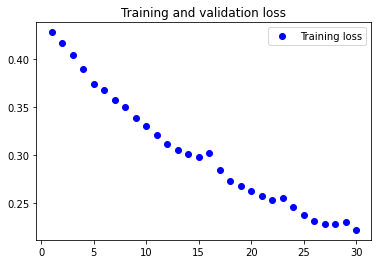

In [36]:
import matplotlib.pyplot as plt
loss = history.history['loss']
epochs = range(1, len(loss) + 1)
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

### Congratulations!

#### Here's what you should remember

- Named-entity recognition (NER) detects and classifies named-entities, and can help process resumes, customer reviews, browsing histories, etc. 
- You must preprocess text data with the corresponding tokenizer to the pretrained model before feeding your input into your Transformer model

## Appendix (Nothing Useful)

In [ ]:
##### Data Input Example - from_tensor_slices

print(type(train_dataset))

import tensorflow as tf
import numpy as np
 
features, labels = (np.random.sample((6, 3)),  # 模拟6组数据，每组数据3个特征
                    np.random.sample((6, 1)))  # 模拟6组数据，每组数据对应一个标签，注意两者的维数必须匹配
 
print((features, labels))  #  输出下组合的数据
data = tf.data.Dataset.from_tensor_slices((features, labels))
print(data)  # 输出张量的信息

ts = tf.constant([[1, 2], [3, 4]])
ds = tf.data.Dataset.from_tensor_slices(ts)   # [1, 2], [3, 4]

for i in ds:
    print(i.numpy())
print(ds.batch(2)) # can select batch size
print("--------")
print(next(ds.batch(2).as_numpy_iterator()))


import tensorflow as tf
t = tf.range(10.)[:, None]
print(t)
print(t.shape)
print("-----")
t = tf.data.Dataset.from_tensor_slices(t)
#<TensorSliceDataset shapes: (1,), types: tf.float32>
for i in t:
    print(i.numpy())

next(train_dataset.batch(1).as_numpy_iterator())[0].shape

next(train_dataset.batch(1).as_numpy_iterator())[1]

next(train_dataset.batch(1).as_numpy_iterator())[1].shape

##### Back to our example

In [171]:
from transformers import TFAutoModelForTokenClassification, AutoTokenizer
import tensorflow as tf

model = TFAutoModelForTokenClassification.from_pretrained("dbmdz/bert-large-cased-finetuned-conll03-english")
tokenizer = AutoTokenizer.from_pretrained("bert-base-cased")

sequence = "Hugging Face Inc. is a company based in New York City. Its headquarters are in DUMBO, " \
           "therefore very close to the Manhattan Bridge."

inputs = tokenizer(sequence, return_tensors="tf")
tokens = inputs.tokens()

outputs = model(**inputs)[0]
predictions = tf.argmax(outputs, axis=2)

Downloading:   0%|          | 0.00/1.24G [00:00<?, ?B/s]

Some layers from the model checkpoint at dbmdz/bert-large-cased-finetuned-conll03-english were not used when initializing TFBertForTokenClassification: ['dropout_147']
- This IS expected if you are initializing TFBertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertForTokenClassification were initialized from the model checkpoint at dbmdz/bert-large-cased-finetuned-conll03-english.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertForTokenClassification for predictions without further training.


Downloading:   0%|          | 0.00/29.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/570 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/208k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/426k [00:00<?, ?B/s]

In [172]:
predictions

<tf.Tensor: shape=(1, 32), dtype=int64, numpy=
array([[0, 6, 6, 6, 6, 0, 0, 0, 0, 0, 0, 8, 8, 8, 0, 0, 0, 0, 0, 8, 8, 8,
        0, 0, 0, 0, 0, 0, 8, 8, 0, 0]])>

In [174]:
from transformers import TFDistilBertForSequenceClassification


In [ ]:
a